# XGBoost with PGD Dataset

## Imports and Loading Data

In [4]:
import xgboost as xgb
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd

In [5]:
# Load adversarial data
adv_train = pd.read_csv("/Users/aryankargwal/adverscredit/models/data/pgd_train.csv")
adv_test = pd.read_csv("/Users/aryankargwal/adverscredit/models/data/pgd_test.csv")

# Assuming the last column is the label and the rest are features
x_train_adv = adv_train.iloc[:, :-1]  # Features
y_train_adv = adv_train.iloc[:, -1]   # Labels
x_test_adv = adv_test.iloc[:, :-1]    # Features
y_test_adv = adv_test.iloc[:, -1]     # Labels

## Defining XGBoost and Parameters for Grid Search

In [6]:
# Define XGBoost parameters to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_model_adv = xgb.XGBClassifier(eval_metric='mlogloss')

# Set up GridSearchCV
grid_search_adv = GridSearchCV(estimator=xgb_model_adv, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV with adversarial data
grid_search_adv.fit(x_train_adv, y_train_adv)

# Get the best model
best_model_adv = grid_search_adv.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


## Training Model

In [7]:
# Evaluate the best model on adversarial test data
y_pred_adv = best_model_adv.predict(x_test_adv)
print("Classification Report (Adversarial Data):\n", classification_report(y_test_adv, y_pred_adv))

# Save the best model
joblib.dump(best_model_adv, 'best_xgboost_adversarial_model.pkl')

print("Best adversarial model saved successfully.")

Classification Report (Adversarial Data):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56750
         1.0       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Best adversarial model saved successfully.


## Evaluating Model

Classification Report (Adversarial Data):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56750
         1.0       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix (Adversarial Data):
[[56688    62]
 [   83 56893]]


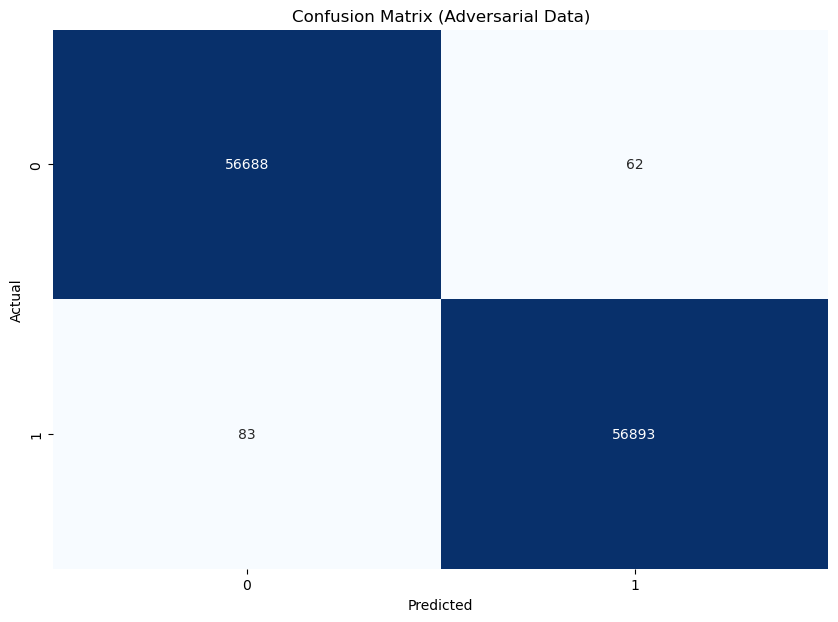

ROC AUC Score (Adversarial Data): 0.9999858430228603


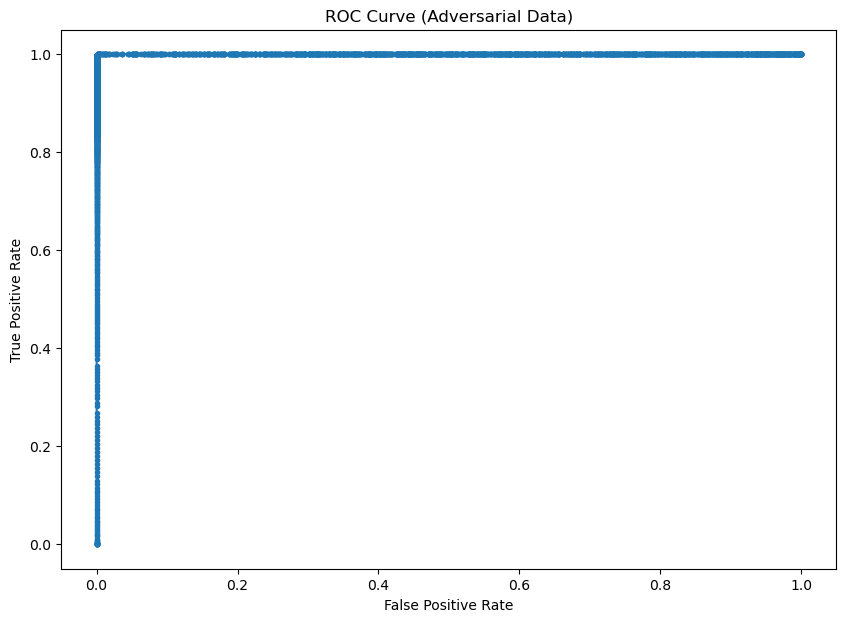

In [9]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


# Load the adversarial datasets
adv_test = pd.read_csv("data/pgd_test.csv")

x_test_adv = adv_test.iloc[:, :-1]  # Features
y_test_adv = adv_test.iloc[:, -1]   # Labels

# Ensure labels are properly formatted
y_test_adv_np = y_test_adv.squeeze().values

# Load the adversarial XGBoost model from .pkl file
with open('best_xgboost_adversarial_model.pkl', 'rb') as f:
    model_adv = pickle.load(f)

# Make predictions
y_pred_prob_adv = model_adv.predict_proba(x_test_adv)[:, 1]
y_pred_adv = (y_pred_prob_adv > 0.5).astype(int)

# Compute metrics
print("Classification Report (Adversarial Data):")
print(classification_report(y_test_adv_np, y_pred_adv))

print("Confusion Matrix (Adversarial Data):")
cm_adv = confusion_matrix(y_test_adv_np, y_pred_adv)
print(cm_adv)

# Plot Confusion Matrix (Adversarial Data)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_adv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Adversarial Data)')
plt.show()

# ROC AUC (Adversarial Data)
roc_auc_adv = roc_auc_score(y_test_adv_np, y_pred_prob_adv)
print(f'ROC AUC Score (Adversarial Data): {roc_auc_adv}')

# ROC Curve (Adversarial Data)
fpr_adv, tpr_adv, _ = roc_curve(y_test_adv_np, y_pred_prob_adv)
plt.figure(figsize=(10, 7))
plt.plot(fpr_adv, tpr_adv, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Adversarial Data)')
plt.show()